<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-17 13:20:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  43.5MB/s    in 4.7s    

2025-05-17 13:20:46 (43.1 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


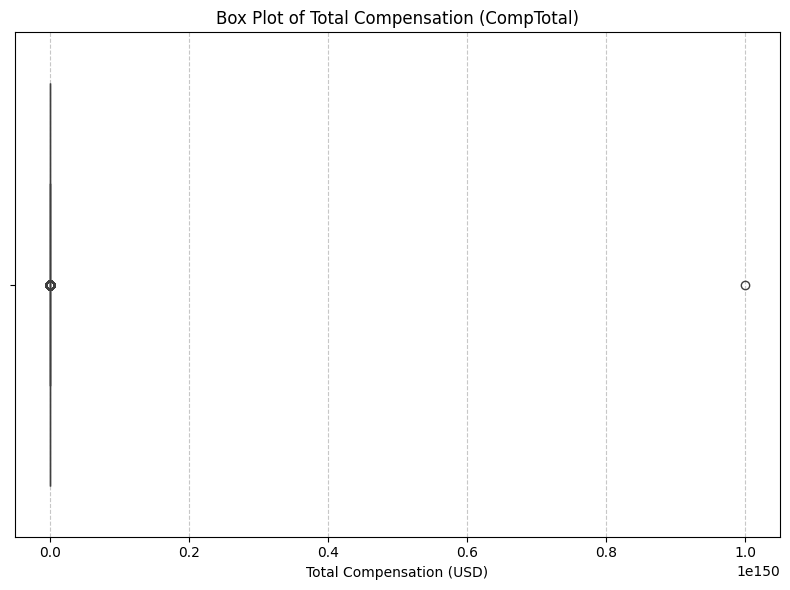

In [8]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query CompTotal (total compensation) excluding NULLs
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Plot box plot of total compensation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CompTotal'])
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


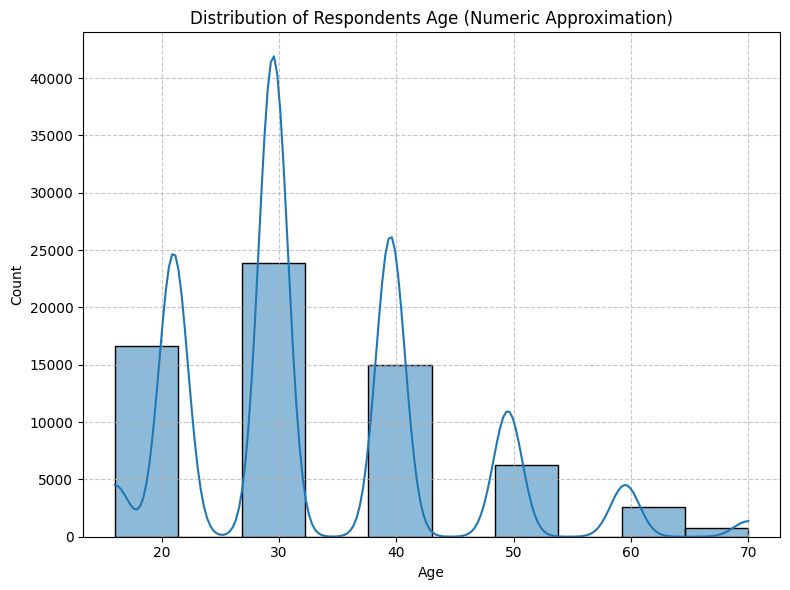

In [9]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age column excluding nulls
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

conn.close()

# Define mapping for Age groups to approximate numeric values (midpoints)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Map Age groups to numeric values
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows where Age is None (e.g. 'Prefer not to say')
df_clean = df.dropna(subset=['AgeNumeric'])

# Plot the distribution of AgeNumeric
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['AgeNumeric'], bins=10, kde=True)
plt.title('Distribution of Respondents Age (Numeric Approximation)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


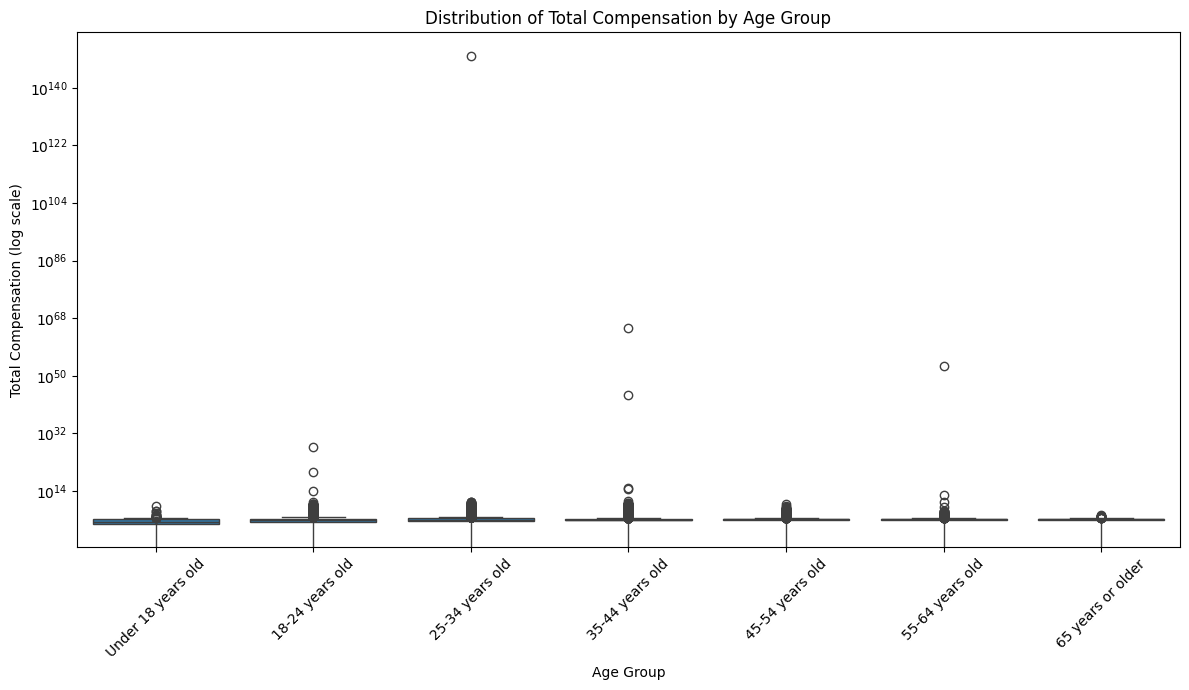

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and CompTotal columns, excluding missing compensation or Age
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
  AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Filter out 'Prefer not to say' from Age if exists
df = df[df['Age'] != 'Prefer not to say']

# Optional: To order age groups logically in the plot
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age', y='CompTotal', data=df, order=age_order)
plt.yscale('log')  # Optional: compensation often skewed, log scale helps
plt.title('Distribution of Total Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


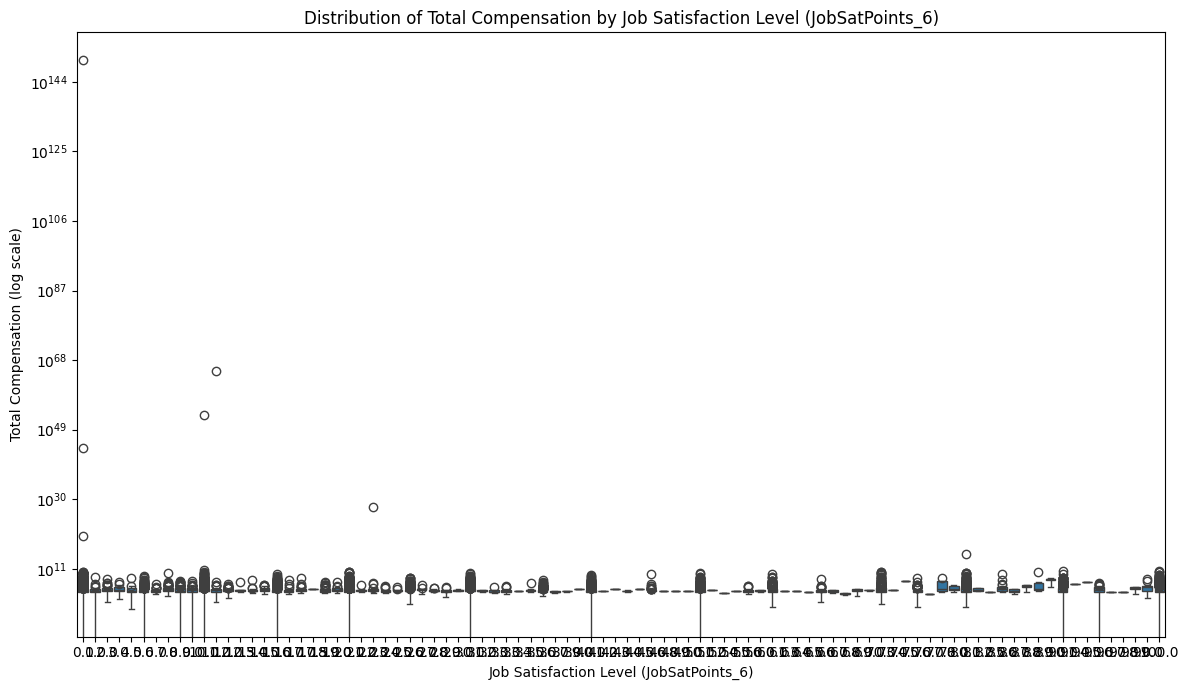

In [11]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query JobSatPoints_6 and CompTotal columns, filtering out missing values
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL
  AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert JobSatPoints_6 to numeric if not already
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6'])

# Sort satisfaction levels if needed
df = df.sort_values('JobSatPoints_6')

# Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
plt.yscale('log')  # Compensation often skewed, so log scale helps visualization
plt.title('Distribution of Total Compensation by Job Satisfaction Level (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


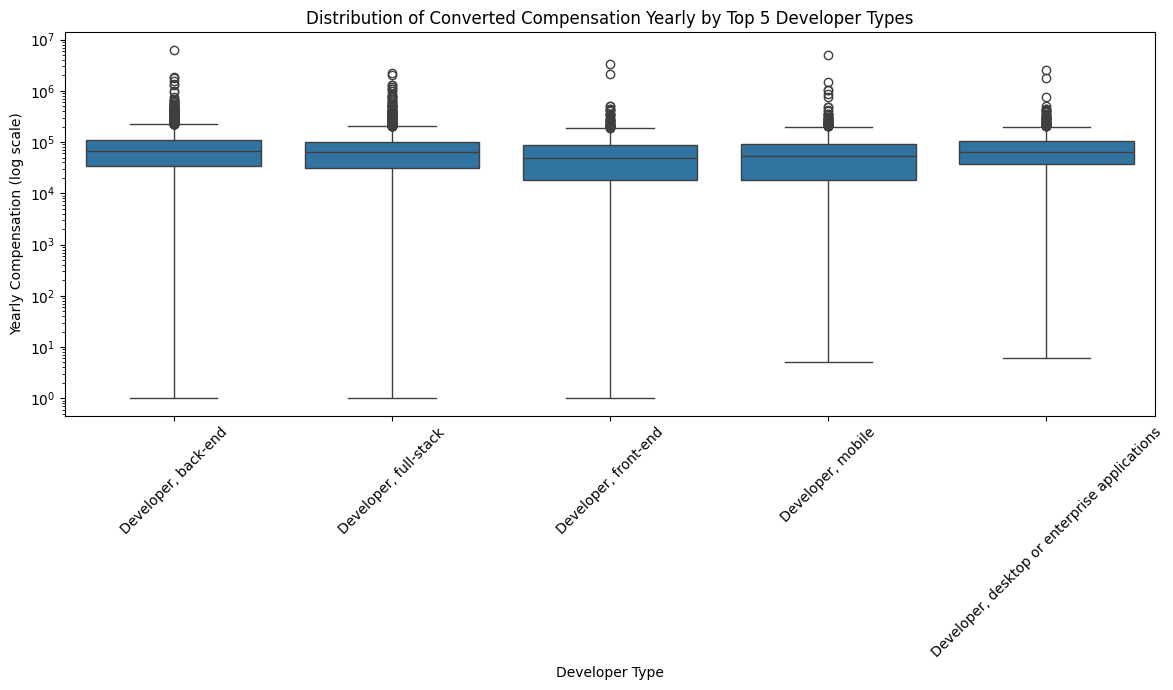

In [12]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query DevType and ConvertedCompYearly columns, filtering out missing values
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL
  AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# DevType column can have multiple developer roles separated by semicolon; split into separate rows
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# Strip whitespace from DevType entries
df['DevType'] = df['DevType'].str.strip()

# Find top 5 developer types by frequency
top_5_devtypes = df['DevType'].value_counts().nlargest(5).index.tolist()

# Filter dataframe for only top 5 developer types
df_top5 = df[df['DevType'].isin(top_5_devtypes)]

# Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5)
plt.yscale('log')  # Log scale to handle skewness in compensation
plt.title('Distribution of Converted Compensation Yearly by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


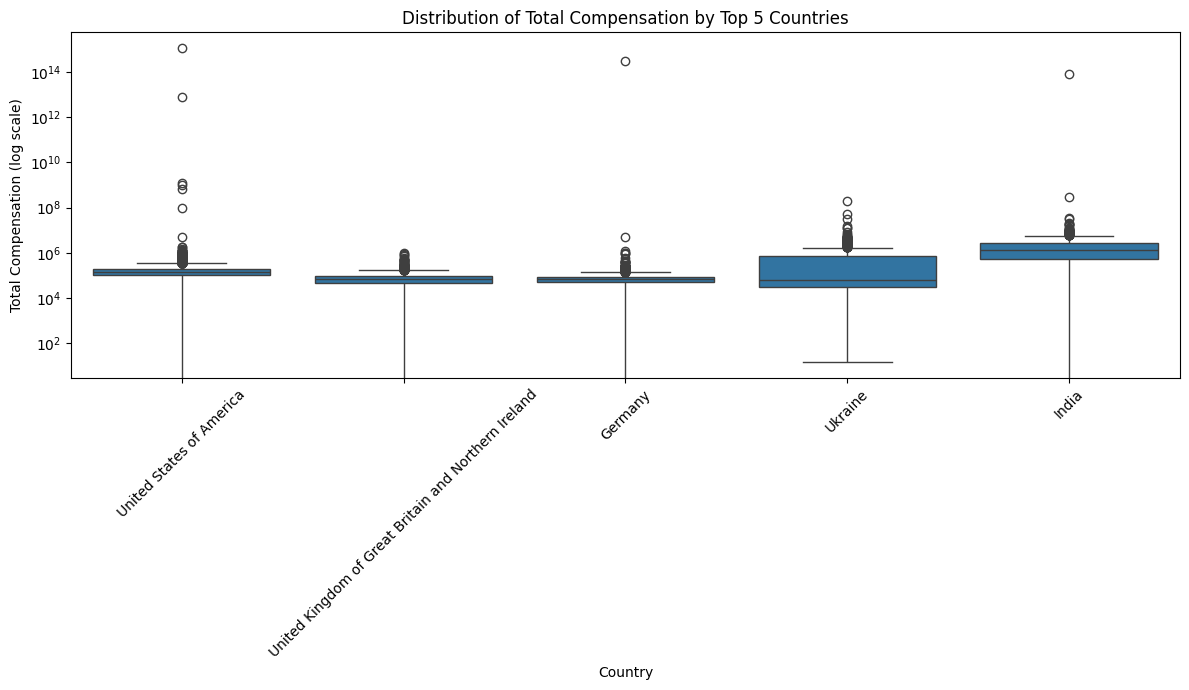

In [13]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Country and CompTotal columns, filtering out missing values
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL
  AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Find top 5 countries by number of respondents
top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Filter dataframe for only top 5 countries
df_top5 = df[df['Country'].isin(top_5_countries)]

# Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='CompTotal', data=df_top5)
plt.yscale('log')  # Use log scale to handle skewed compensation distribution
plt.title('Distribution of Total Compensation by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


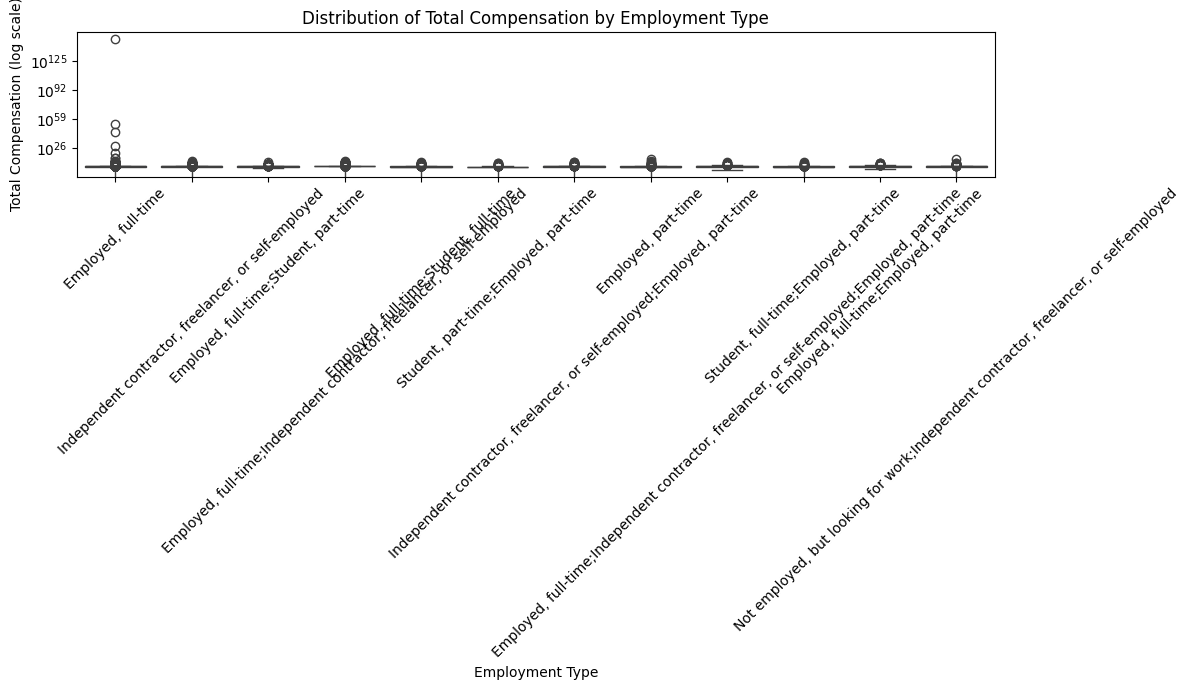

In [14]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Employment and CompTotal columns, filtering out missing values
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL
  AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Optional: filter out rare employment types if needed
employment_counts = df['Employment'].value_counts()
common_employment_types = employment_counts[employment_counts > 100].index.tolist()
df_filtered = df[df['Employment'].isin(common_employment_types)]

# Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Employment', y='CompTotal', data=df_filtered)
plt.yscale('log')  # Log scale to better visualize compensation spread
plt.title('Distribution of Total Compensation by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


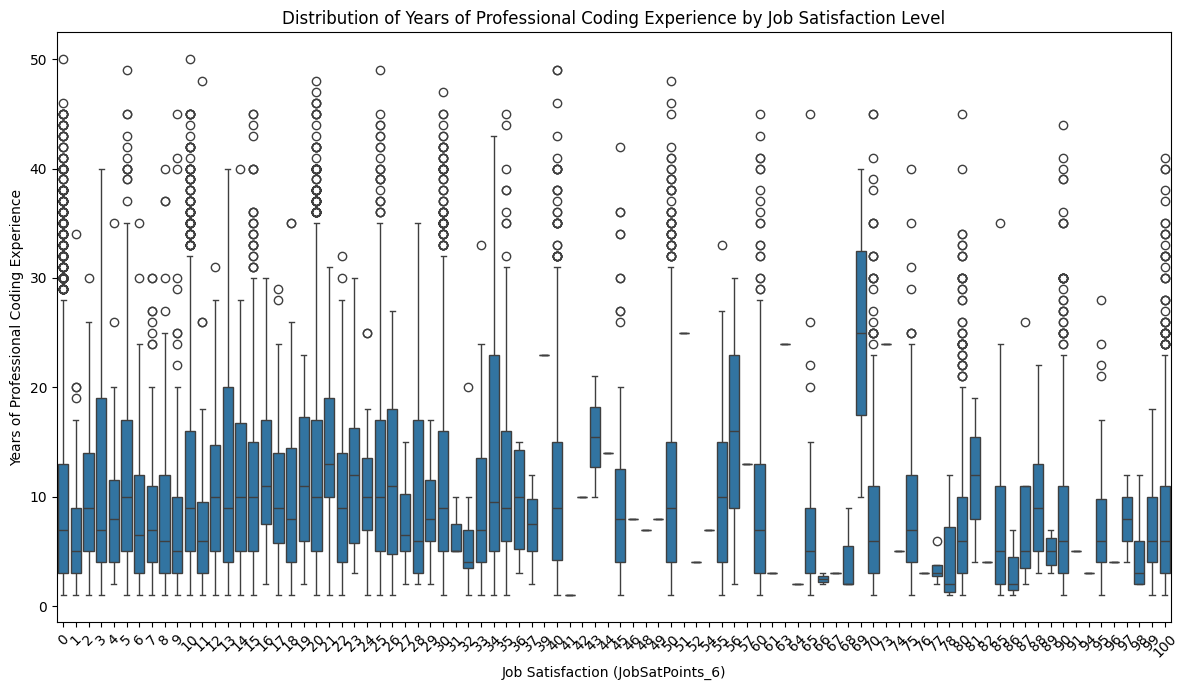

In [15]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query YearsCodePro and JobSatPoints_6, filtering out nulls
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert YearsCodePro to numeric, coercing errors (in case of any text)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where conversion resulted in NaN
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Optional: convert JobSatPoints_6 to int or category for better grouping
df['JobSatPoints_6'] = df['JobSatPoints_6'].astype(int)

# Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)
plt.title('Distribution of Years of Professional Coding Experience by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [16]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
